In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [3]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','country','country_long','year_of_capacity_data','other_fuel2'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
  if df[i].dtypes == 'object':
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [7]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [8]:
df.fillna(df.mean(), inplace=True)

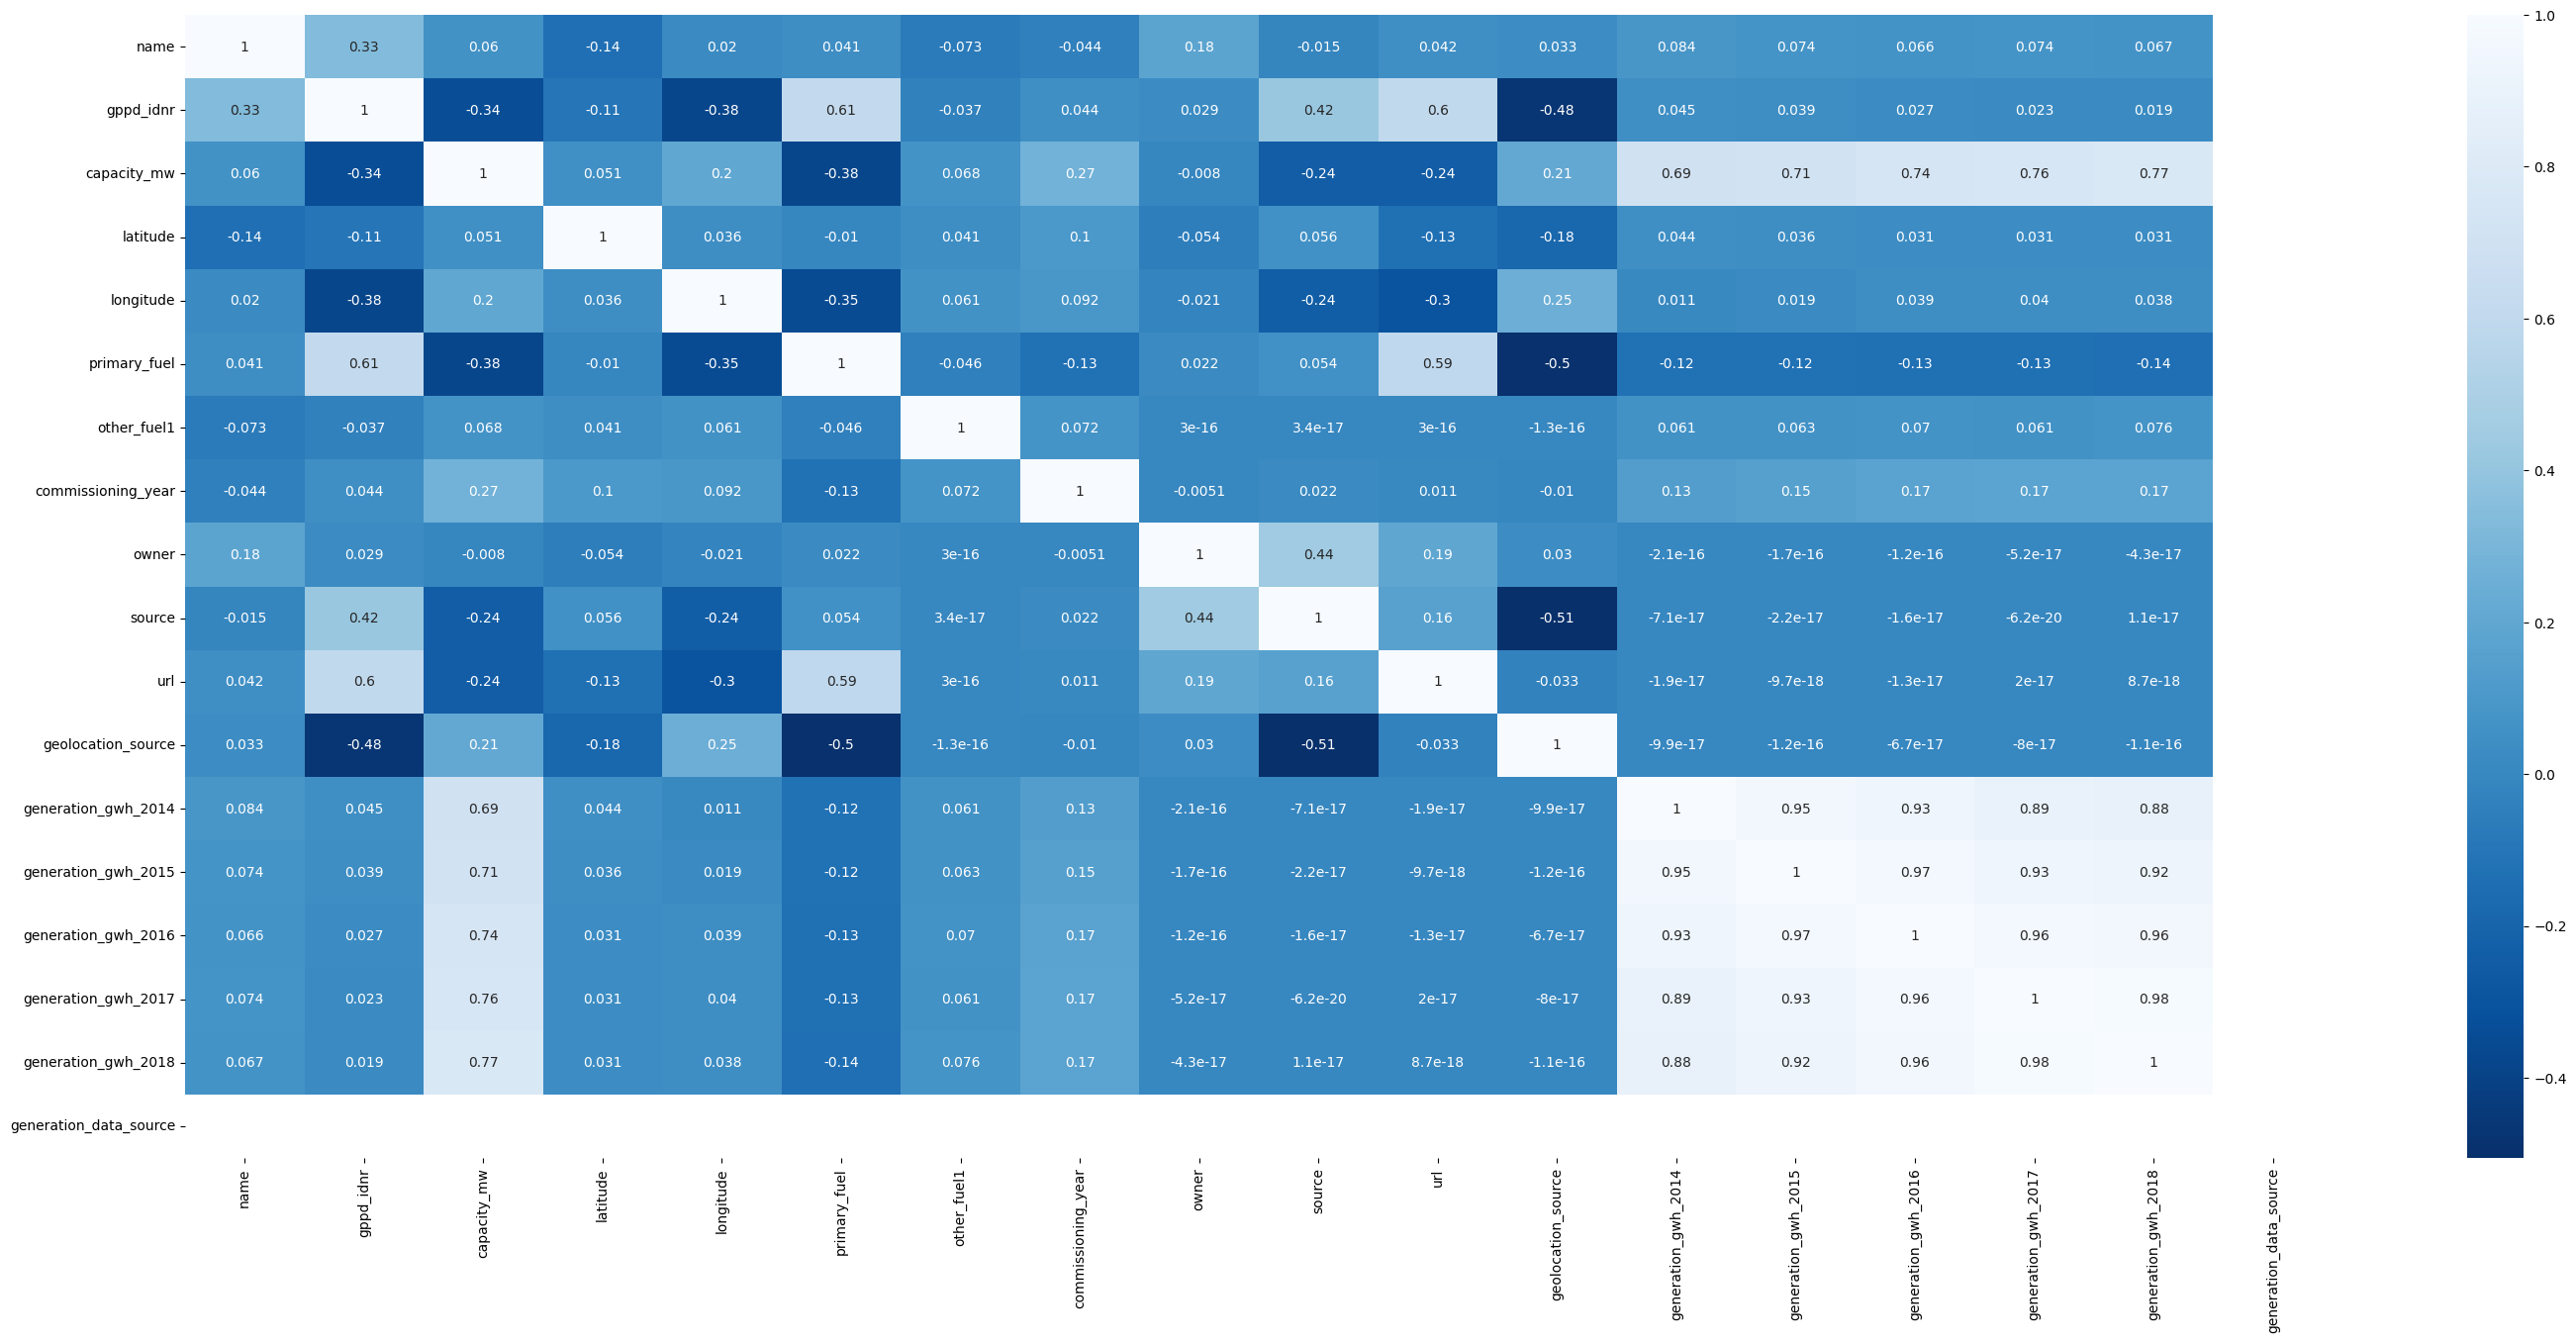

In [9]:

plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),annot=True,cmap="Blues_r")
plt.show()

In [10]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1.979798,1997.091082,140.704678,43.847850,94.469680,1.727477,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.080829,13.016360,49.806105,44.642818,70.381222,0.676024,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,1.979798,1997.091082,140.704678,22.000000,58.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,1.979798,1997.091082,140.704678,22.000000,58.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,1.979798,2003.000000,140.704678,29.500000,115.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


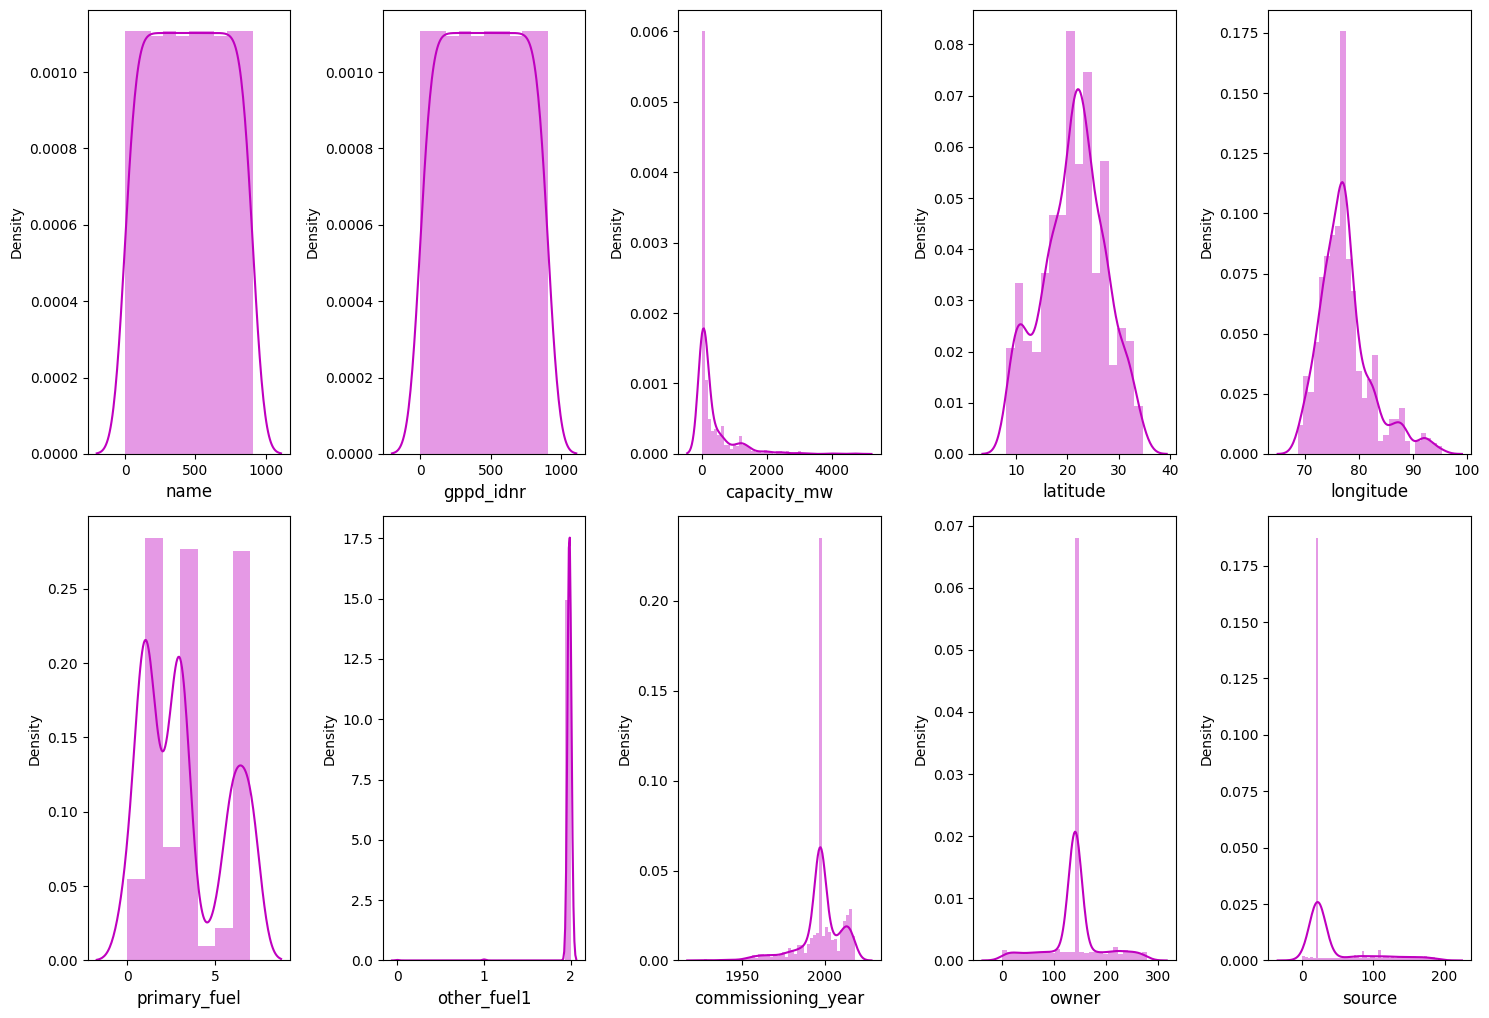

In [11]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1

plt.tight_layout()

#by distplot we can observe skwness in data

In [12]:
numeric_columns = df.select_dtypes(include=np.number).columns
skewness_threshold = 0.5  # You can adjust this threshold as needed

# Apply cube root transformation to columns with skewness above the threshold
for col in numeric_columns:
    if df[col].skew() > skewness_threshold:
        df[col] = np.cbrt(df[col])

# You can check the skewness after the transformation
skewness_after = df[numeric_columns].apply(lambda x: x.skew())
print("Skewness after transformation:")
print(skewness_after)

Skewness after transformation:
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                1.013378
latitude                  -0.149698
longitude                  1.002134
primary_fuel               0.472251
other_fuel1              -20.192471
commissioning_year        -1.399359
owner                     -0.067595
source                     1.323520
url                        0.615432
geolocation_source        -2.146561
generation_gwh_2014       -0.371187
generation_gwh_2015       -0.269579
generation_gwh_2016       -0.279323
generation_gwh_2017       -0.331857
generation_gwh_2018       -0.316915
generation_data_source     0.000000
dtype: float64


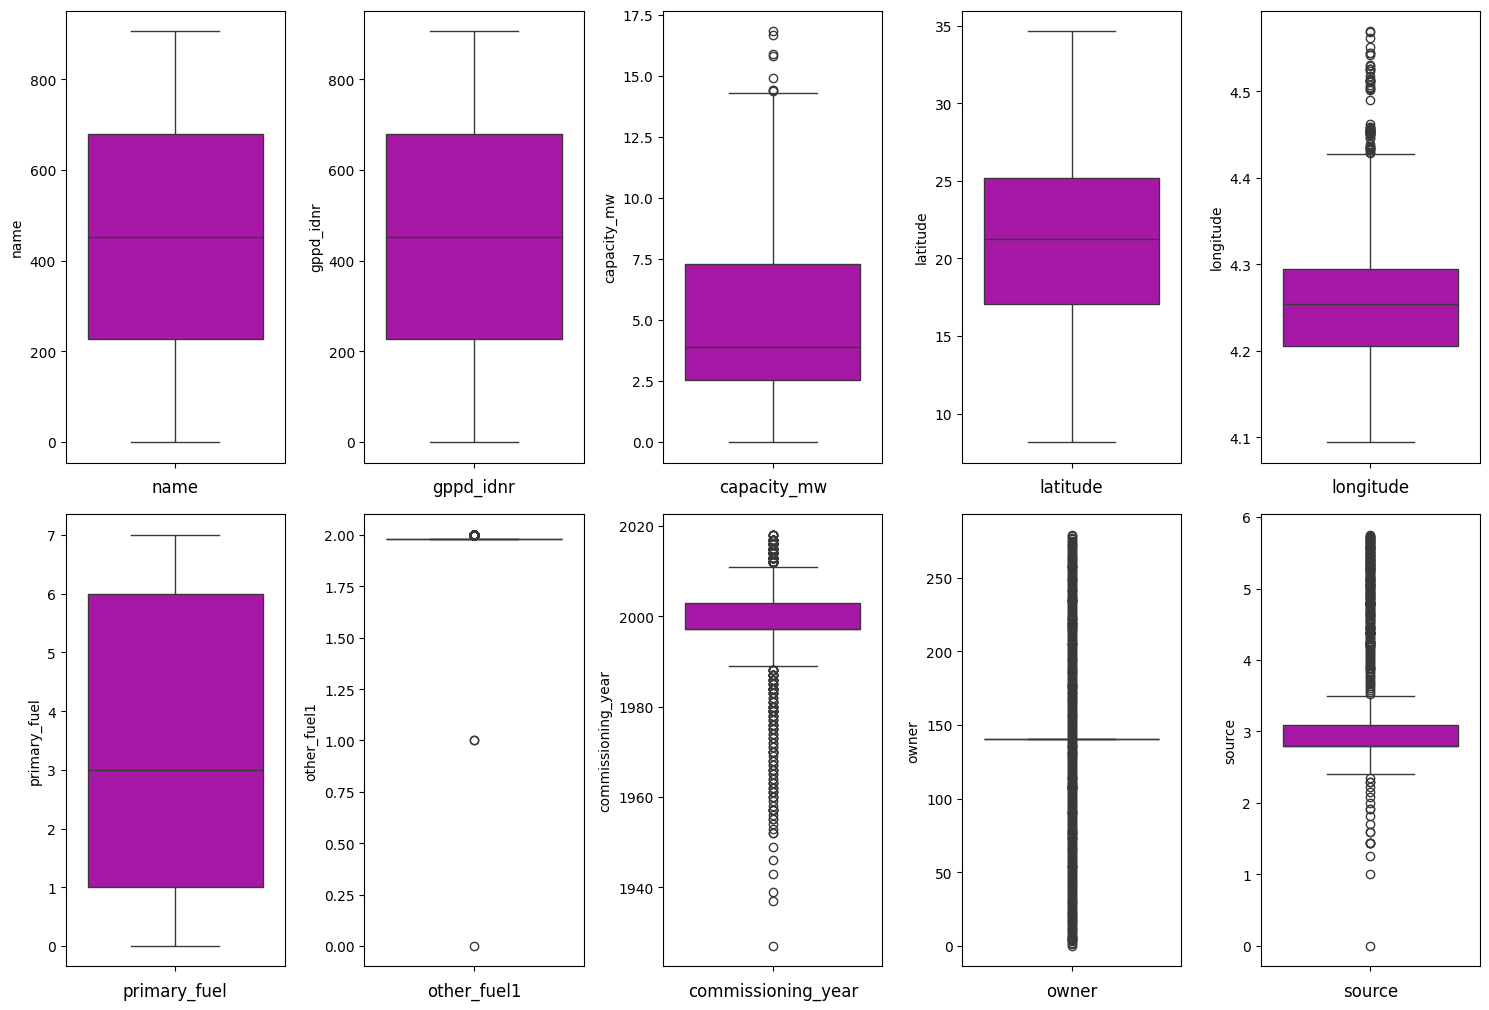

In [13]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1

plt.tight_layout()

#not any outlier is present in graph

In [14]:
df.drop(['source','commissioning_year','generation_gwh_2014'],axis=1,inplace=True)

In [15]:
df.drop(['owner'],axis=1,inplace=True)

In [16]:
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif["VIF Values"]= [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]

vif

,VIF Values
0,1.317646
1,3.010732
2,1.107095
3,1.249777
4,2.425951
5,1.036438
6,2.128594
7,2.056468
8,6.451709
9,12.104593


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [22]:
lr=LinearRegression()
RFR=RandomForestRegressor()
DTC=DecisionTreeClassifier()
knn=KNN()
las =Lasso()
rid=Ridge()

model=[lr,RFR,knn,las,rid]

for m in model:

  m.fit(x_train,y_train)
  m.score(x_train,y_train)
  predm=m.predict(x_test)
  print("r2_score",m,"is")
  print(r2_score(y_test,predm)*100)
  print(mean_absolute_error(y_test,predm))
  print(mean_squared_error(y_test,predm))
  print('\n')

r2_score LinearRegression() is
40.65736545791947
1.856575844923752
6.264142031443643


r2_score RandomForestRegressor() is
89.91515104665888
0.7571171604014276
1.0645453592827585


r2_score KNeighborsRegressor() is
73.96352060883886
1.1304394583169861
2.748381600573114


r2_score Lasso() is
19.530513745520484
2.244426666804307
8.49426883361436


r2_score Ridge() is
40.76810372605011
1.8560226390012755
6.252452623899822




In [23]:

from sklearn.model_selection import cross_val_score

lr=LinearRegression()
RFR=RandomForestRegressor()
DTC=DecisionTreeClassifier()
knn=KNN()
las =Lasso()
rid=Ridge()

model = [lr,RFR,knn,las,rid]

for i in model:
  i.fit(x_train,y_train)
  score = cross_val_score(i, x, y)
  print(score)
  print(score.mean())

  # Make predictions on the test set
  pred = i.predict(x_test)

  # Calculate and print the difference between accuracy on test set and cross-validation mean
  print("Difference for", i, "model:", r2_score(y_test, pred) - score.mean())
  print('\n')

[  0.52513698   0.44680763   0.44896914   0.50885656 -90.03356762]
-17.620759462556578
Difference for LinearRegression() model: 18.027333117135772


[0.83023524 0.85032608 0.81960143 0.88857488 0.86655623]
0.8510587691573452
Difference for RandomForestRegressor() model: 0.04786686624057346


[0.71278953 0.67881983 0.64485022 0.72288795 0.66692494]
0.6852544965001071
Difference for KNeighborsRegressor() model: 0.05438070958828156


[0.21905128 0.23079352 0.17857461 0.16541078 0.15652415]
0.19007086989607488
Difference for Lasso() model: 0.0052342675591299515


[  0.52547876   0.44711269   0.44915281   0.50896994 -61.21962924]
-11.857783007742125
Difference for Ridge() model: 12.265464045002625




In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {

              'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_depth':[0,10,20],
              'random_state':[10,50,100],
              'n_jobs':[-2,-1,1],
              'n_estimators':[50,100,200,300]
}

In [25]:
GCV=GridSearchCV(RandomForestRegressor(),param_grid,cv=5)

In [26]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [27]:
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [28]:
Final_model = RandomForestRegressor(criterion= 'absolute_error',
 max_depth = 20,
 n_estimators= 100,
 n_jobs= -2,
 random_state = 50)

In [29]:
import joblib
joblib.dump(Final_model,'GlobalPower_capacity_mw.pkl')

['GlobalPower_capacity_mw.pkl']

In [30]:
model=joblib.load('GlobalPower_capacity_mw.pkl')

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already created an instance of ExtraTreesClassifier, e.g., model = ExtraTreesClassifier()
model.fit(x_train, y_train)  # Make sure to replace x_train and y_train with your actual training data

# Now you can make predictions
predictions = model.predict(x_test)  # Replace x_test with your actual test data


In [32]:
a=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['predicted']= predictions
df_pred['original']=a
df_pred

,predicted,original
0,6.826417,5.720517
1,2.808987,3.693830
2,4.609013,3.459395
3,6.175848,9.165656
4,1.770470,1.650964
...,...,...
268,4.563720,6.265827
269,1.855540,1.796702
270,2.702308,2.714418
271,11.136683,10.000000
